<a href="https://colab.research.google.com/github/Madushani-Weerasekara/PyTorch-Linear-Regression/blob/main/pytorch_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# We would like to generate 20 data points
N = 20

# Random data on th X-axes in(-5,5)
x = np.random.random(N)*10-5

# A line plus some noise
y = 0.5*x-1+ np.random.random(N)


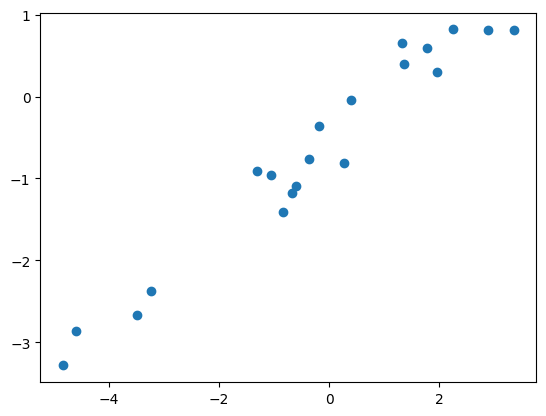

In [15]:
# Plot the data
plt.scatter(x,y);

In [16]:
# Create the linear regression model
model = nn.Linear(1,1)

In [17]:
#Cost/Loss and Optimizer
criterion = nn.MSELoss()
Optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [18]:
# In ML we want our data to be shape:
# (num_samples x num_dimensions)
x = x.reshape(N,1)
y = y.reshape(N,1)


In [19]:
# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(x.astype(np.float32))
target = torch.from_numpy(y.astype(np.float32))

In [20]:
type(inputs)

torch.Tensor

In [21]:
type(target)

torch.Tensor

In [22]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # Zero the parameter gradient
  Optimizer.zero_grad()

  # Forwad pass
  outputs = model(inputs)
  loss = criterion(outputs, target)

  # Keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  Optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss : {loss.item() : .4f}')



Epoch 1/30, Loss :  6.6406
Epoch 2/30, Loss :  1.1636
Epoch 3/30, Loss :  0.7613
Epoch 4/30, Loss :  0.5179
Epoch 5/30, Loss :  0.3608
Epoch 6/30, Loss :  0.2594
Epoch 7/30, Loss :  0.1939
Epoch 8/30, Loss :  0.1517
Epoch 9/30, Loss :  0.1244
Epoch 10/30, Loss :  0.1067
Epoch 11/30, Loss :  0.0953
Epoch 12/30, Loss :  0.0880
Epoch 13/30, Loss :  0.0833
Epoch 14/30, Loss :  0.0802
Epoch 15/30, Loss :  0.0782
Epoch 16/30, Loss :  0.0769
Epoch 17/30, Loss :  0.0761
Epoch 18/30, Loss :  0.0756
Epoch 19/30, Loss :  0.0752
Epoch 20/30, Loss :  0.0750
Epoch 21/30, Loss :  0.0749
Epoch 22/30, Loss :  0.0748
Epoch 23/30, Loss :  0.0747
Epoch 24/30, Loss :  0.0747
Epoch 25/30, Loss :  0.0747
Epoch 26/30, Loss :  0.0746
Epoch 27/30, Loss :  0.0746
Epoch 28/30, Loss :  0.0746
Epoch 29/30, Loss :  0.0746
Epoch 30/30, Loss :  0.0746


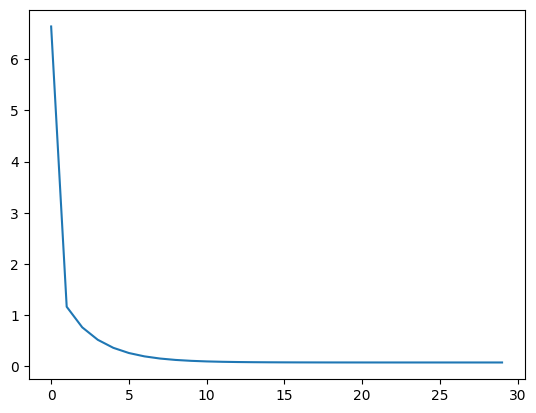

In [23]:
# Plot the loss per iteration
plt.plot(losses);


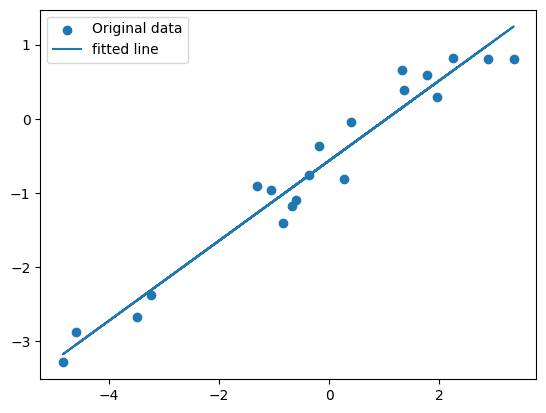

In [33]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(x,y, label = 'Original data')
plt.plot(x, predicted , label = 'fitted line')
plt.legend()
plt.show()
